## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9669419	total: 52.4ms	remaining: 52.3s
1:	learn: 0.9345952	total: 52.6ms	remaining: 26.2s
2:	learn: 0.9070645	total: 53.2ms	remaining: 17.7s


3:	learn: 0.8768611	total: 53.9ms	remaining: 13.4s
4:	learn: 0.8519883	total: 55ms	remaining: 10.9s
5:	learn: 0.8242071	total: 55.6ms	remaining: 9.21s
6:	learn: 0.8016039	total: 55.9ms	remaining: 7.93s
7:	learn: 0.7785963	total: 56.5ms	remaining: 7.01s
8:	learn: 0.7526660	total: 57ms	remaining: 6.27s
9:	learn: 0.7286176	total: 57.3ms	remaining: 5.67s
10:	learn: 0.7058921	total: 57.5ms	remaining: 5.17s
11:	learn: 0.6830723	total: 57.7ms	remaining: 4.75s
12:	learn: 0.6631706	total: 57.9ms	remaining: 4.4s
13:	learn: 0.6418196	total: 58.2ms	remaining: 4.09s
14:	learn: 0.6219448	total: 59.7ms	remaining: 3.92s
15:	learn: 0.6022916	total: 60.3ms	remaining: 3.71s
16:	learn: 0.5836987	total: 60.8ms	remaining: 3.52s
17:	learn: 0.5665142	total: 61.2ms	remaining: 3.34s
18:	learn: 0.5508260	total: 61.9ms	remaining: 3.2s
19:	learn: 0.5349908	total: 62.1ms	remaining: 3.04s
20:	learn: 0.5191112	total: 62.9ms	remaining: 2.93s
21:	learn: 0.5027161	total: 63.2ms	remaining: 2.81s
22:	learn: 0.4865690	tota

161:	learn: 0.0458018	total: 150ms	remaining: 776ms
162:	learn: 0.0455914	total: 151ms	remaining: 775ms
163:	learn: 0.0453756	total: 151ms	remaining: 772ms
164:	learn: 0.0452040	total: 153ms	remaining: 772ms
165:	learn: 0.0450677	total: 153ms	remaining: 769ms
166:	learn: 0.0448582	total: 153ms	remaining: 765ms
167:	learn: 0.0447281	total: 154ms	remaining: 762ms
168:	learn: 0.0445093	total: 154ms	remaining: 759ms
169:	learn: 0.0442965	total: 155ms	remaining: 756ms
170:	learn: 0.0440116	total: 155ms	remaining: 753ms
171:	learn: 0.0438585	total: 156ms	remaining: 752ms
172:	learn: 0.0436859	total: 156ms	remaining: 748ms
173:	learn: 0.0434726	total: 157ms	remaining: 745ms
174:	learn: 0.0433548	total: 158ms	remaining: 743ms
175:	learn: 0.0431573	total: 158ms	remaining: 740ms
176:	learn: 0.0430229	total: 159ms	remaining: 738ms
177:	learn: 0.0428577	total: 159ms	remaining: 735ms
178:	learn: 0.0427086	total: 160ms	remaining: 734ms
179:	learn: 0.0425814	total: 161ms	remaining: 732ms
180:	learn: 

219:	learn: 0.0370949	total: 192ms	remaining: 681ms
220:	learn: 0.0370297	total: 192ms	remaining: 678ms
221:	learn: 0.0369371	total: 192ms	remaining: 675ms
222:	learn: 0.0368253	total: 195ms	remaining: 678ms
223:	learn: 0.0367215	total: 195ms	remaining: 677ms
224:	learn: 0.0366686	total: 196ms	remaining: 675ms
225:	learn: 0.0366092	total: 197ms	remaining: 674ms
226:	learn: 0.0365098	total: 197ms	remaining: 672ms
227:	learn: 0.0364086	total: 198ms	remaining: 670ms
228:	learn: 0.0362116	total: 199ms	remaining: 669ms
229:	learn: 0.0360861	total: 199ms	remaining: 667ms
230:	learn: 0.0359671	total: 200ms	remaining: 665ms
231:	learn: 0.0358627	total: 200ms	remaining: 663ms
232:	learn: 0.0357014	total: 201ms	remaining: 661ms
233:	learn: 0.0355201	total: 201ms	remaining: 659ms
234:	learn: 0.0354505	total: 202ms	remaining: 656ms
235:	learn: 0.0353500	total: 202ms	remaining: 655ms
236:	learn: 0.0351226	total: 203ms	remaining: 653ms
237:	learn: 0.0349805	total: 203ms	remaining: 651ms
238:	learn: 

380:	learn: 0.0244580	total: 306ms	remaining: 497ms
381:	learn: 0.0244204	total: 310ms	remaining: 501ms
382:	learn: 0.0243572	total: 311ms	remaining: 502ms
383:	learn: 0.0243380	total: 312ms	remaining: 501ms
384:	learn: 0.0242789	total: 313ms	remaining: 499ms
385:	learn: 0.0242318	total: 313ms	remaining: 499ms
386:	learn: 0.0241867	total: 314ms	remaining: 497ms
387:	learn: 0.0241498	total: 314ms	remaining: 496ms
388:	learn: 0.0240887	total: 315ms	remaining: 495ms
389:	learn: 0.0240517	total: 316ms	remaining: 494ms
390:	learn: 0.0240213	total: 317ms	remaining: 494ms
391:	learn: 0.0239851	total: 318ms	remaining: 493ms
392:	learn: 0.0239235	total: 320ms	remaining: 494ms
393:	learn: 0.0238902	total: 321ms	remaining: 493ms
394:	learn: 0.0238302	total: 322ms	remaining: 493ms
395:	learn: 0.0237819	total: 322ms	remaining: 492ms
396:	learn: 0.0237436	total: 323ms	remaining: 491ms
397:	learn: 0.0236803	total: 324ms	remaining: 489ms
398:	learn: 0.0236464	total: 324ms	remaining: 488ms
399:	learn: 

437:	learn: 0.0221520	total: 344ms	remaining: 441ms
438:	learn: 0.0220760	total: 344ms	remaining: 440ms
439:	learn: 0.0220165	total: 345ms	remaining: 438ms
440:	learn: 0.0219441	total: 345ms	remaining: 437ms
441:	learn: 0.0219159	total: 345ms	remaining: 436ms
442:	learn: 0.0218855	total: 346ms	remaining: 435ms
443:	learn: 0.0218565	total: 347ms	remaining: 435ms
444:	learn: 0.0217874	total: 348ms	remaining: 434ms
445:	learn: 0.0217624	total: 349ms	remaining: 433ms
446:	learn: 0.0217152	total: 349ms	remaining: 432ms
447:	learn: 0.0216703	total: 350ms	remaining: 431ms
448:	learn: 0.0216345	total: 350ms	remaining: 430ms
449:	learn: 0.0216076	total: 351ms	remaining: 429ms
450:	learn: 0.0215960	total: 351ms	remaining: 428ms
451:	learn: 0.0215579	total: 352ms	remaining: 426ms
452:	learn: 0.0214921	total: 352ms	remaining: 425ms
453:	learn: 0.0214681	total: 353ms	remaining: 424ms
454:	learn: 0.0214341	total: 353ms	remaining: 423ms
455:	learn: 0.0214099	total: 354ms	remaining: 422ms
456:	learn: 

658:	learn: 0.0165252	total: 459ms	remaining: 237ms
659:	learn: 0.0165058	total: 460ms	remaining: 237ms
660:	learn: 0.0164949	total: 461ms	remaining: 236ms
661:	learn: 0.0164885	total: 461ms	remaining: 236ms
662:	learn: 0.0164558	total: 462ms	remaining: 235ms
663:	learn: 0.0164423	total: 462ms	remaining: 234ms
664:	learn: 0.0164278	total: 463ms	remaining: 233ms
665:	learn: 0.0164037	total: 463ms	remaining: 232ms
666:	learn: 0.0163825	total: 463ms	remaining: 231ms
667:	learn: 0.0163699	total: 464ms	remaining: 231ms
668:	learn: 0.0163481	total: 464ms	remaining: 230ms
669:	learn: 0.0163339	total: 465ms	remaining: 229ms
670:	learn: 0.0163177	total: 465ms	remaining: 228ms
671:	learn: 0.0163059	total: 466ms	remaining: 227ms
672:	learn: 0.0162876	total: 467ms	remaining: 227ms
673:	learn: 0.0162645	total: 467ms	remaining: 226ms
674:	learn: 0.0162388	total: 467ms	remaining: 225ms
675:	learn: 0.0162111	total: 468ms	remaining: 224ms
676:	learn: 0.0161986	total: 468ms	remaining: 223ms
677:	learn: 

727:	learn: 0.0154653	total: 495ms	remaining: 185ms
728:	learn: 0.0154440	total: 495ms	remaining: 184ms
729:	learn: 0.0154221	total: 496ms	remaining: 183ms
730:	learn: 0.0153986	total: 498ms	remaining: 183ms
731:	learn: 0.0153819	total: 498ms	remaining: 182ms
732:	learn: 0.0153772	total: 499ms	remaining: 182ms
733:	learn: 0.0153653	total: 499ms	remaining: 181ms
734:	learn: 0.0153560	total: 500ms	remaining: 180ms
735:	learn: 0.0153472	total: 500ms	remaining: 179ms
736:	learn: 0.0153349	total: 501ms	remaining: 179ms
737:	learn: 0.0153251	total: 501ms	remaining: 178ms
738:	learn: 0.0153170	total: 502ms	remaining: 177ms
739:	learn: 0.0152989	total: 502ms	remaining: 176ms
740:	learn: 0.0152818	total: 503ms	remaining: 176ms
741:	learn: 0.0152682	total: 503ms	remaining: 175ms
742:	learn: 0.0152514	total: 503ms	remaining: 174ms
743:	learn: 0.0152260	total: 504ms	remaining: 174ms
744:	learn: 0.0152050	total: 505ms	remaining: 173ms
745:	learn: 0.0151892	total: 505ms	remaining: 172ms
746:	learn: 

956:	learn: 0.0127966	total: 606ms	remaining: 27.2ms
957:	learn: 0.0127894	total: 607ms	remaining: 26.6ms
958:	learn: 0.0127840	total: 607ms	remaining: 25.9ms
959:	learn: 0.0127782	total: 609ms	remaining: 25.4ms
960:	learn: 0.0127700	total: 609ms	remaining: 24.7ms
961:	learn: 0.0127601	total: 610ms	remaining: 24.1ms
962:	learn: 0.0127494	total: 610ms	remaining: 23.5ms
963:	learn: 0.0127431	total: 611ms	remaining: 22.8ms
964:	learn: 0.0127335	total: 611ms	remaining: 22.2ms
965:	learn: 0.0127311	total: 612ms	remaining: 21.5ms
966:	learn: 0.0127296	total: 612ms	remaining: 20.9ms
967:	learn: 0.0127214	total: 613ms	remaining: 20.3ms
968:	learn: 0.0127077	total: 614ms	remaining: 19.6ms
969:	learn: 0.0126940	total: 614ms	remaining: 19ms
970:	learn: 0.0126896	total: 615ms	remaining: 18.4ms
971:	learn: 0.0126627	total: 615ms	remaining: 17.7ms
972:	learn: 0.0126481	total: 616ms	remaining: 17.1ms
973:	learn: 0.0126389	total: 616ms	remaining: 16.5ms
974:	learn: 0.0126340	total: 617ms	remaining: 15

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.02230808043276358
ABC Pre-generator MAE 0.11142787156987578


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

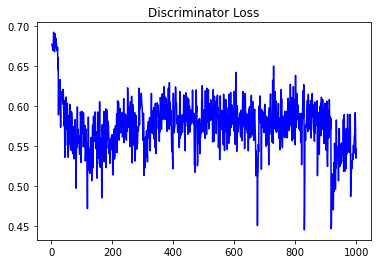

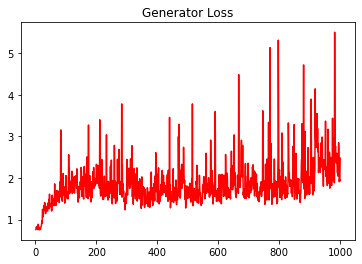

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.09278637190240545


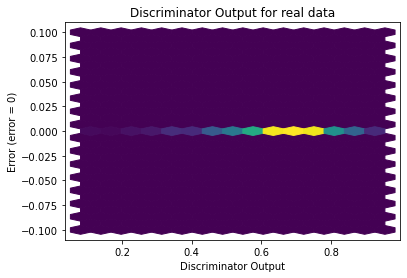

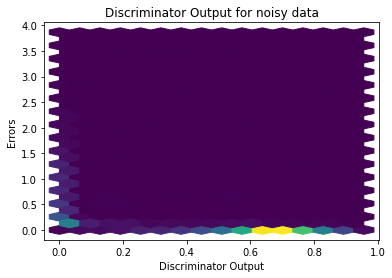

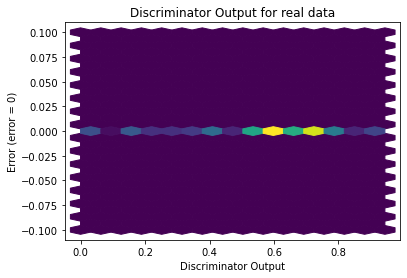

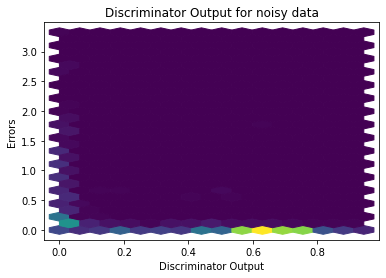

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


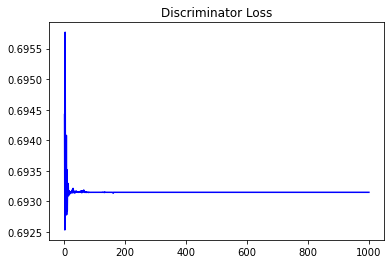

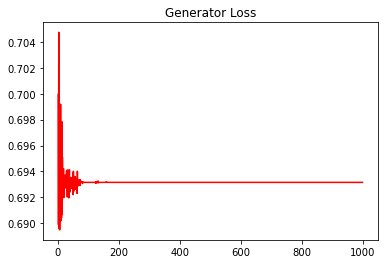

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.0836389967475038


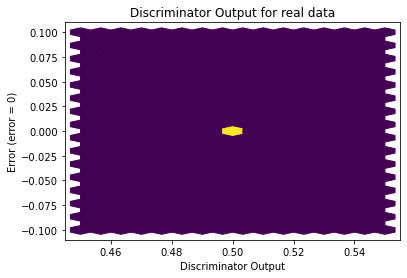

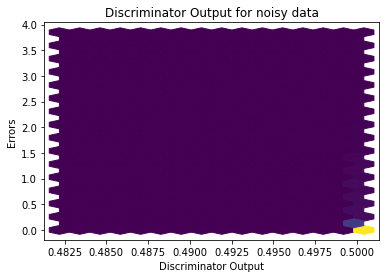

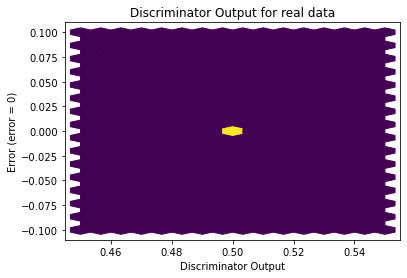

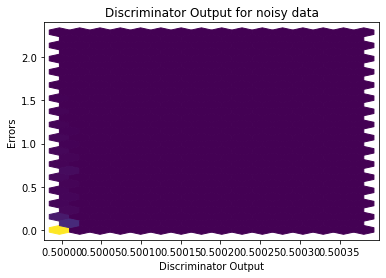

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


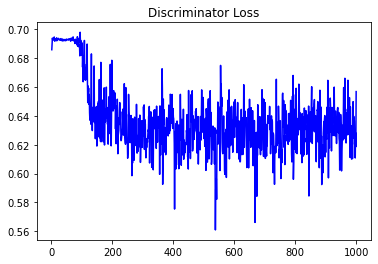

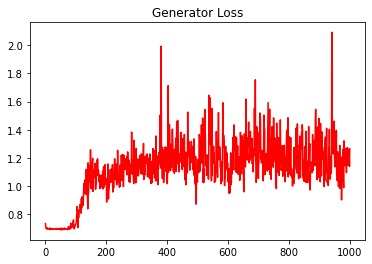

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.06622827524210435


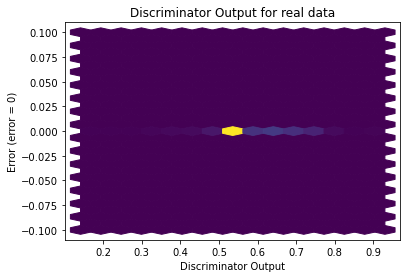

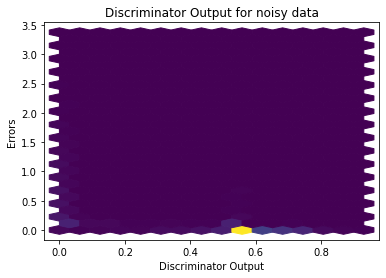

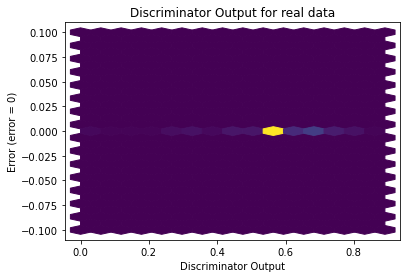

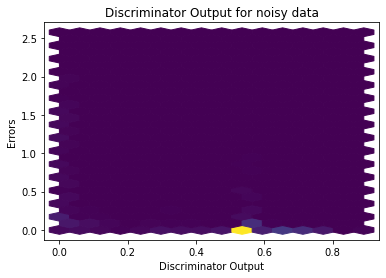

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0460]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2826]], requires_grad=True)
